In [ ]:
#Roll:1703139
#Name: Showmik Ahmed Pranta
import numpy as np, matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
srate=256
t=np.arange(0,3,1/srate)
pnts=len(t)

x=2*np.sin(20*np.pi*7*t*t)
noise = 5*np.random.randn(pnts)

Noisysignal=x+noise

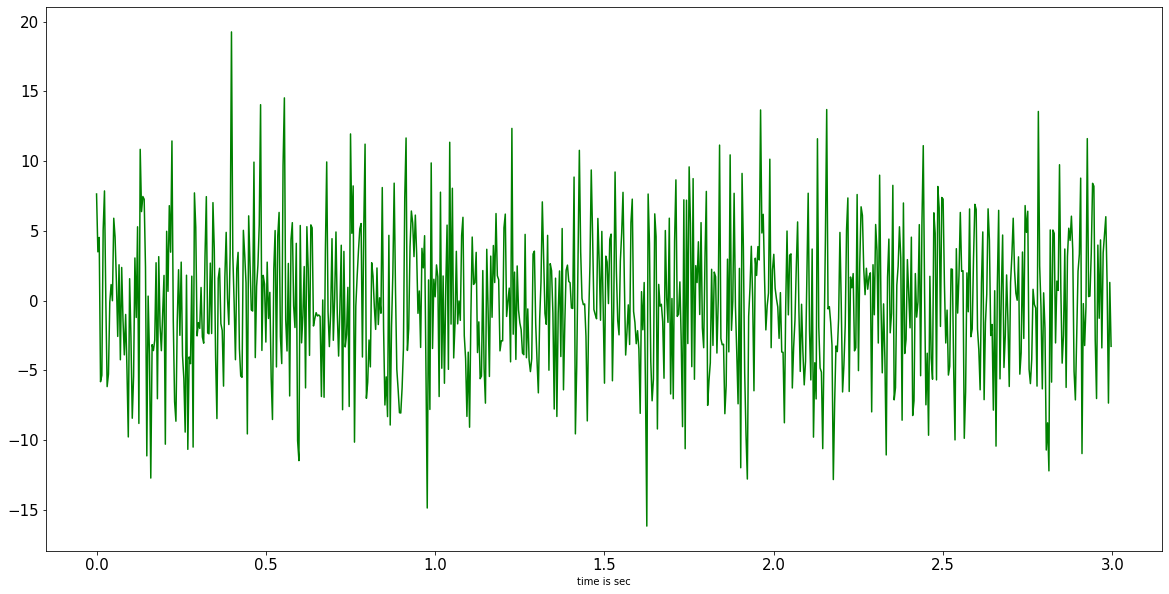

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Noisysignal,'g',label='Noisy signal')
plt.xlabel('time is sec')
plt.show()



In [ ]:
N=30  
# N=order of moving average filter
#Filter window is actually 2N+1


In [ ]:
Noisysignal.shape[0]

768

In [ ]:
filt_sig=np.zeros(Noisysignal.shape[0])

In [ ]:
#Applying moving average signal

for i in range(0,Noisysignal.shape[0]):
  filt_sig[i]=np.mean(Noisysignal[i:(2*N+1)+i])

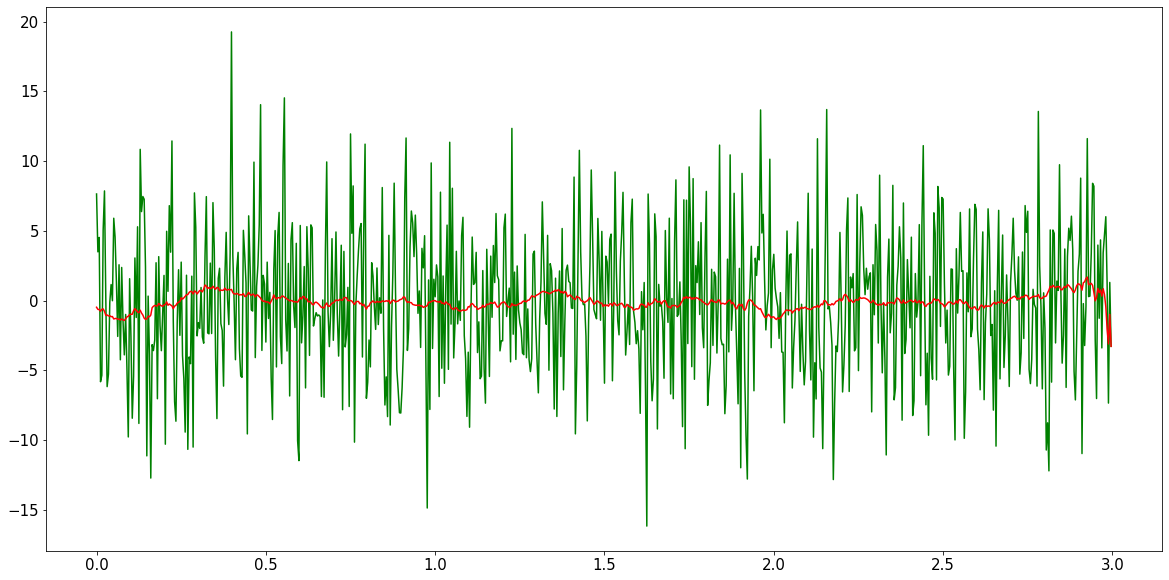

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(t,Noisysignal,'g-',label='Noisysignal')
plt.plot(t,filt_sig,'r-',label='Filtered signal')
plt.show()


In [ ]:
#signal denoising by gaussian filter

srate=512
t=np.arange(0,3,1/srate)
pnts=len(t)

x=2*np.sin(20*np.pi*7*t*t)
noise = 5*np.random.randn(pnts)

Noisysignal=x+noise

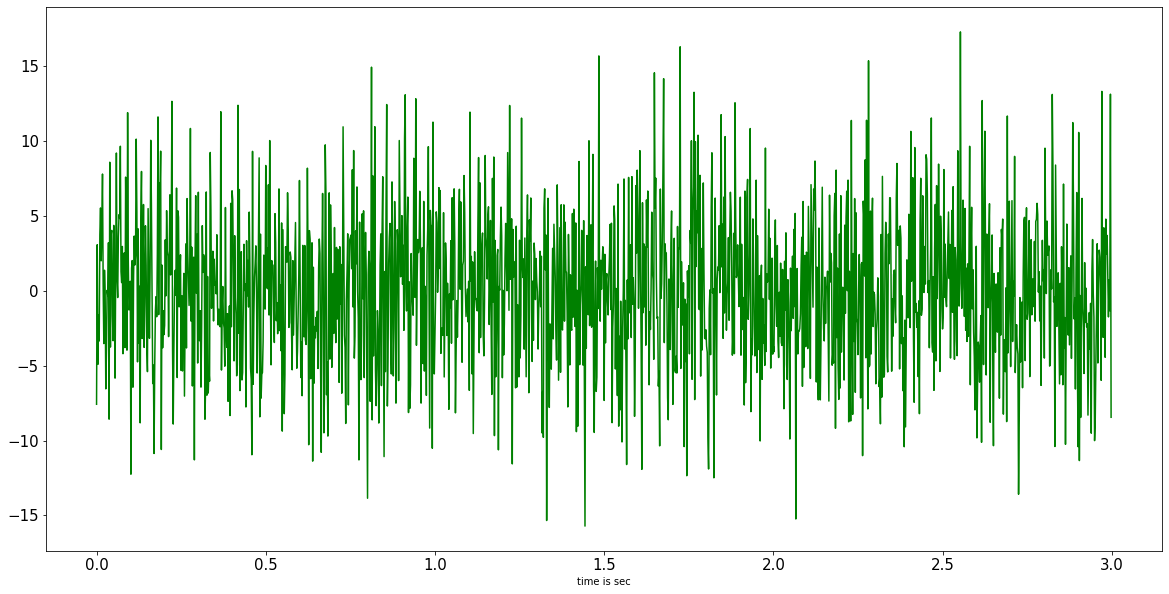

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Noisysignal,'g',label='Noisy signal')
plt.xlabel('time is sec')
plt.show()



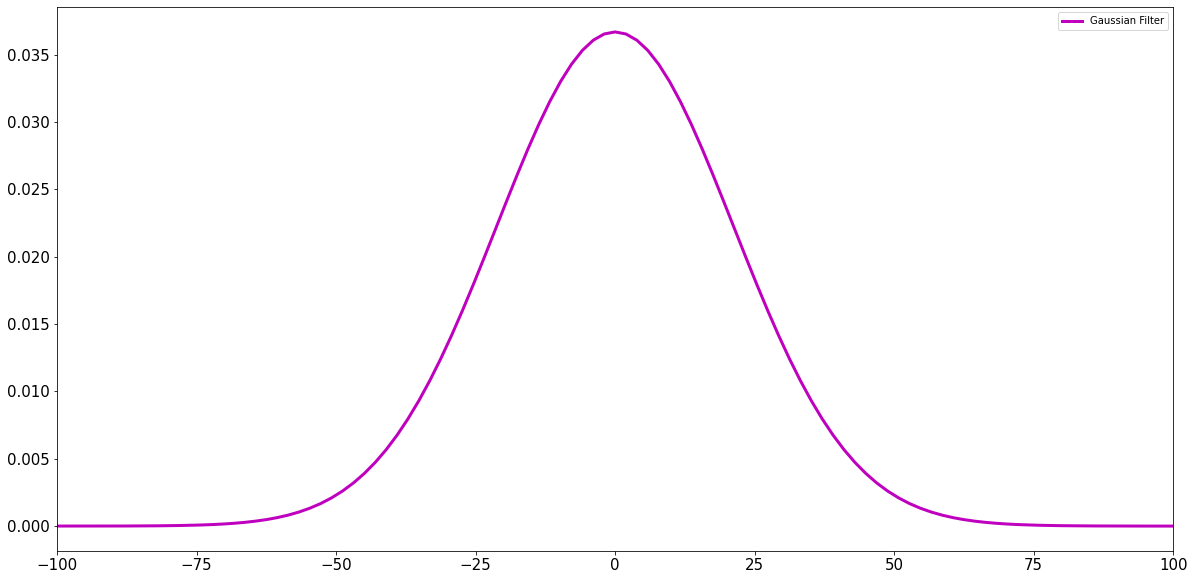

In [ ]:
#generating Gaussian Filteer/kernel

N=100
fwhm=50
Gtime=1000*np.arange(-N,N)/srate
Gfilter=np.exp(-(4*np.log(2)*Gtime**2)/fwhm**2)
Gfilter=Gfilter/np.sum(Gfilter)

plt.figure(figsize=(20,10))
plt.plot(Gtime,Gfilter,'m',linewidth=3,label='Gaussian Filter')
#x time sec
#y gain ms
plt.xlim([-100,100])
plt.legend()
plt.show()


In [ ]:
#zero padding the nosiy signal

In [ ]:
sig_4_filter=np.concatenate((np.zeros(N),Noisysignal,np.zeros(N)),axis=0)

K=len(Noisysignal)

timeindex=np.concatenate((np.arange(-N,0),np.arange(0,K), np.arange(K,K+N)),axis=0)

time_4_filter=timeindex/srate

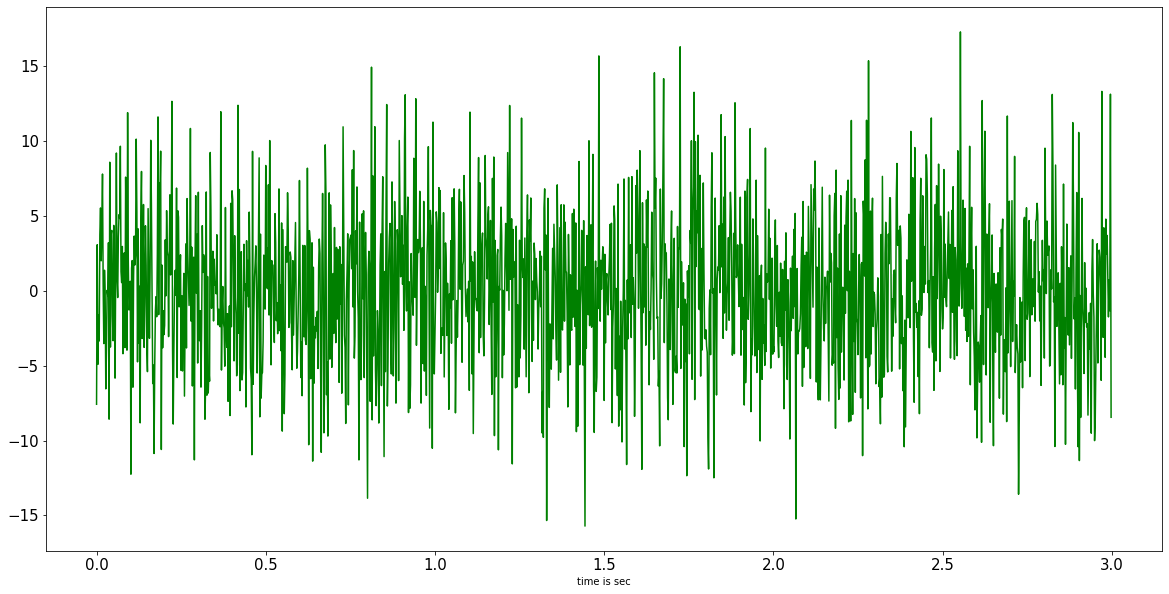

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Noisysignal,'g',label='Zero padded to ')
plt.xlabel('time is sec')
plt.show()



In [ ]:
#initializing the filtered signal
Gfilt_sig=np.zeros(sig_4_filter.shape[0])

#Apply gaussian filter
for i in range(0,Noisysignal.shape[0]):
  Gfilt_sig[i]=np.sum(sig_4_filter[i:2*N+i]*Gfilter)

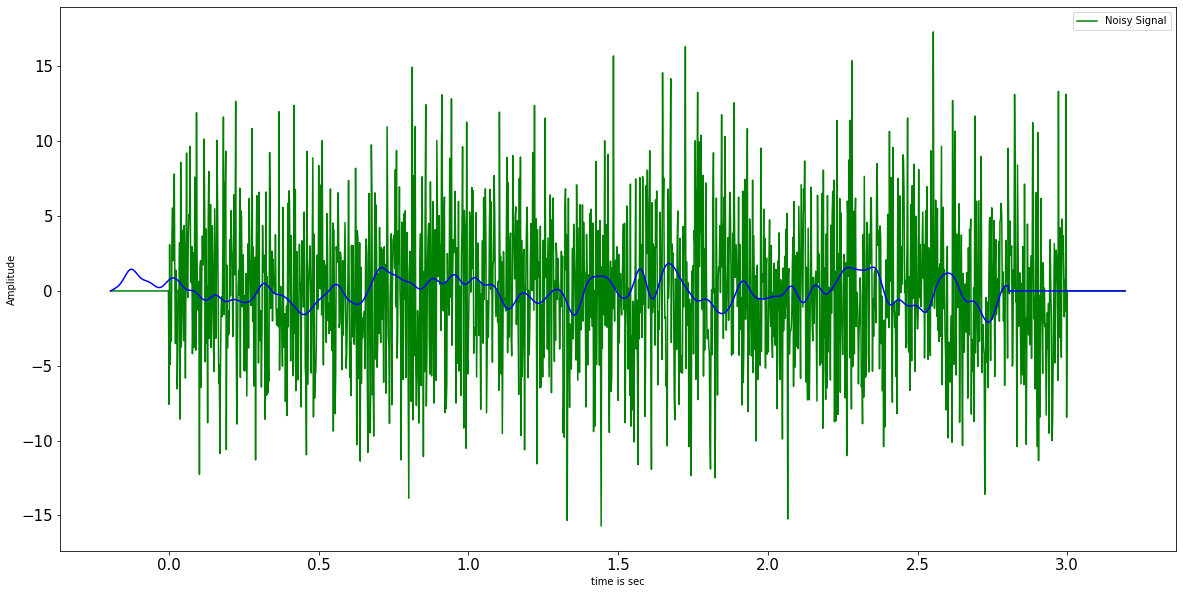

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(time_4_filter,sig_4_filter,'g',label='Noisy Signal')
plt.plot(time_4_filter,Gfilt_sig,'b')
plt.xlabel('time is sec')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



Gaussian filtering is used to remove noise from a signal. 

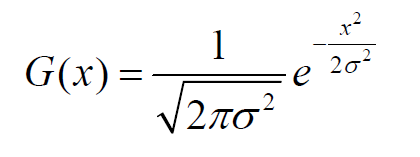

Where σ is the standard deviation of the distribution. 

The Gaussian filter works by using the 2D distribution as a point-spread
function. This is achieved by convolving the 2D Gaussian distribution function
with the noisy signal